In [ ]:
!pip install requests beautifulsoup4 pandas matplotlib seaborn

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

base_url = "https://www.venuelook.com/gurgaon/unique-venues?page={}"
headers = {"User-Agent": "Mozilla/5.0"}
venues = []

for page in range(1, 6):
    print(f"Scraping page {page}...")
    url = base_url.format(page)
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, "html.parser")
    cards = soup.find_all("div", class_="venue-details")
    for card in cards:
        name = card.find("a", class_="title").get_text(strip=True) if card.find("a", class_="title") else "N/A"
        location = card.find("div", class_="venue-location").get_text(strip=True) if card.find("div", class_="venue-location") else "N/A"
        price = card.find("span", class_="currency").get_text(strip=True) if card.find("span", class_="currency") else "N/A"
        try:
            capacity = card.find("span", string="Guests:").find_next("span").get_text(strip=True)
        except:
            capacity = "N/A"
        venues.append({"Name": name, "Location": location, "Price": price, "Capacity": capacity})

df = pd.DataFrame(venues)
df.to_csv("gurgaon_unique_venues.csv", index=False)
print("CSV file 'gurgaon_unique_venues.csv' created successfully.")

Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
CSV file 'gurgaon_unique_venues.csv' created successfully.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/gurgaon_event_venues_enhanced.csv')
df.head()

,Venue Name,Capacity,Starting Price (per plate),Location,Rating,Tags
0,Chander Party Lawn of Aapno Ghar Resort,200–2500,2950,Sector 77,4.5,"Amusement Park, Outdoor Lawn"
1,Abhinandan Hall of Aapno Ghar Resort,30–250,2450,Sector 77,4.5,Banquet Hall
2,Baza Restaurant of Aapno Ghar Resort,up to 150,1600,Sector 77,4.0,"Restaurant, Indoor"
3,Eton II of The Acura Bmk,30–100,1000,DLF Phase ___,4.8,Hotel Banquet
4,Hall 1 of Cherish Elegance,50–400,1299,-,NaN,Banquet Hall


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Venue Name                  31 non-null     object 
 1   Capacity                    31 non-null     object 
 2   Starting Price (per plate)  31 non-null     int64  
 3   Location                    31 non-null     object 
 4   Rating                      15 non-null     float64
 5   Tags                        31 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.6+ KB
None


In [ ]:
print(df.isnull().sum())

Venue Name                     0
Capacity                       0
Starting Price (per plate)     0
Location                       0
Rating                        16
Tags                           0
dtype: int64


In [ ]:
import numpy as np

def parse_capacity(cap):
    if pd.isna(cap):
        return np.nan
    cap = str(cap).replace("up to", "").replace("–", "-").strip()
    if "-" in cap:
        parts = cap.split("-")
        try:
            return (int(parts[0]) + int(parts[1])) / 2
        except:
            return np.nan
    else:
        try:
            return int(cap)
        except:
            return np.nan

df['Parsed Capacity'] = df['Capacity'].apply(parse_capacity)

In [ ]:
df['Starting Price (per plate)'] = pd.to_numeric(df['Starting Price (per plate)'], errors='coerce')
print(df[['Parsed Capacity', 'Starting Price (per plate)', 'Rating']].describe())

       Parsed Capacity  Starting Price (per plate)     Rating
count        31.000000                   31.000000  15.000000
mean        262.419355                 1432.193548   4.100000
std         330.053887                  806.012259   0.813283
min          16.000000                  200.000000   2.000000
25%          82.750000                  775.000000   4.000000
50%         125.000000                 1250.000000   4.100000
75%         342.500000                 2350.000000   4.650000
max        1350.000000                 2950.000000   5.000000


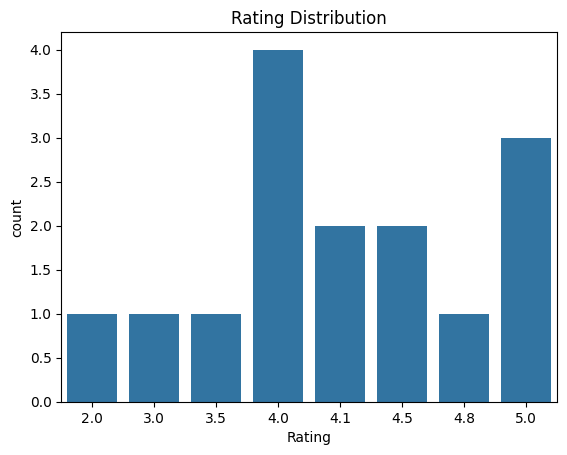

In [ ]:
sns.countplot(data=df, x='Rating')
plt.title("Rating Distribution")
plt.show()

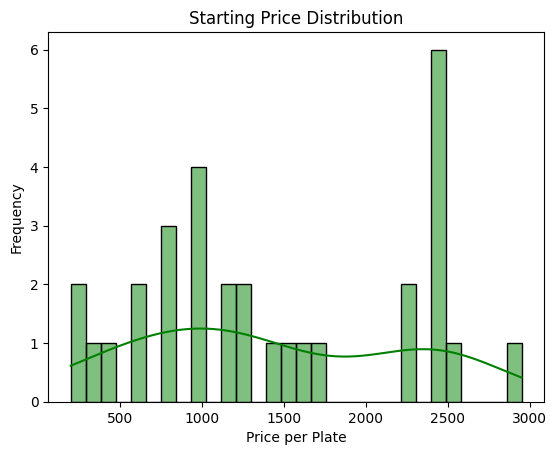

In [ ]:
sns.histplot(df['Starting Price (per plate)'], bins=30, kde=True, color='green')
plt.title("Starting Price Distribution")
plt.xlabel("Price per Plate")
plt.ylabel("Frequency")
plt.show()

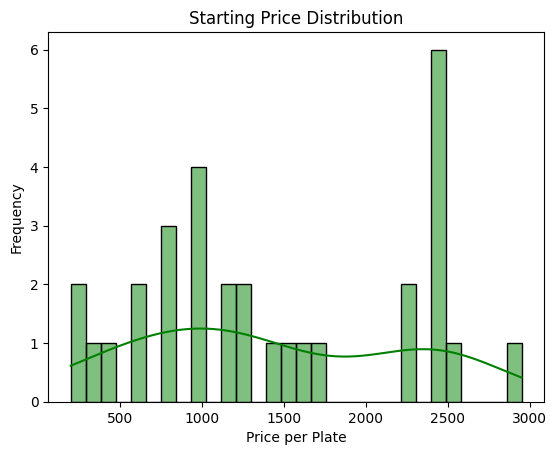

In [ ]:
sns.histplot(df['Starting Price (per plate)'], bins=30, kde=True, color='green')
plt.title("Starting Price Distribution")
plt.xlabel("Price per Plate")
plt.ylabel("Frequency")
plt.show()

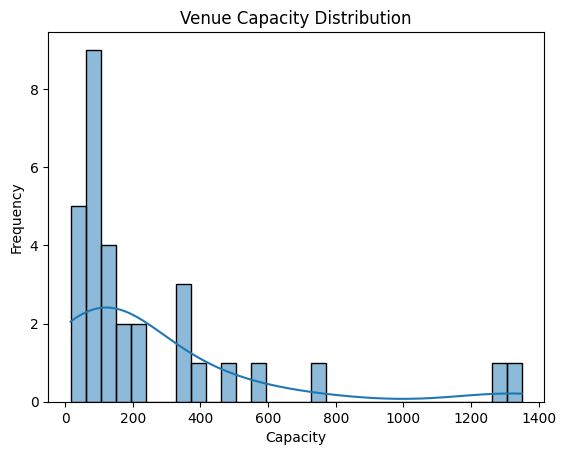

In [ ]:
sns.histplot(df['Parsed Capacity'], bins=30, kde=True)
plt.title("Venue Capacity Distribution")
plt.xlabel("Capacity")
plt.ylabel("Frequency")
plt.show()

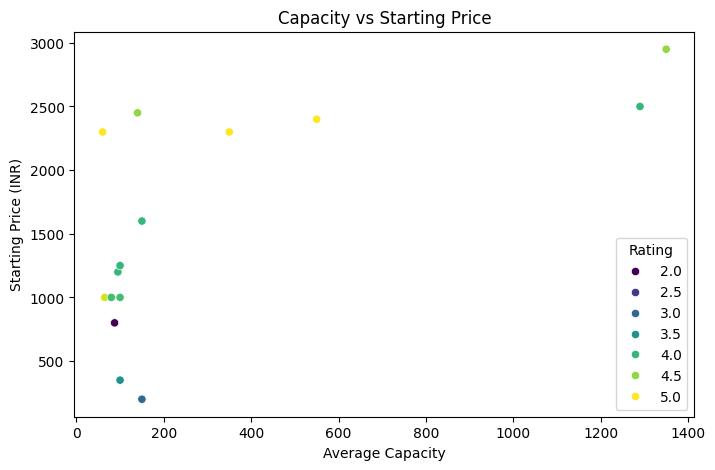

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Parsed Capacity', y='Starting Price (per plate)', hue='Rating', data=df, palette='viridis')
plt.title("Capacity vs Starting Price")
plt.xlabel("Average Capacity")
plt.ylabel("Starting Price (INR)")
plt.show()

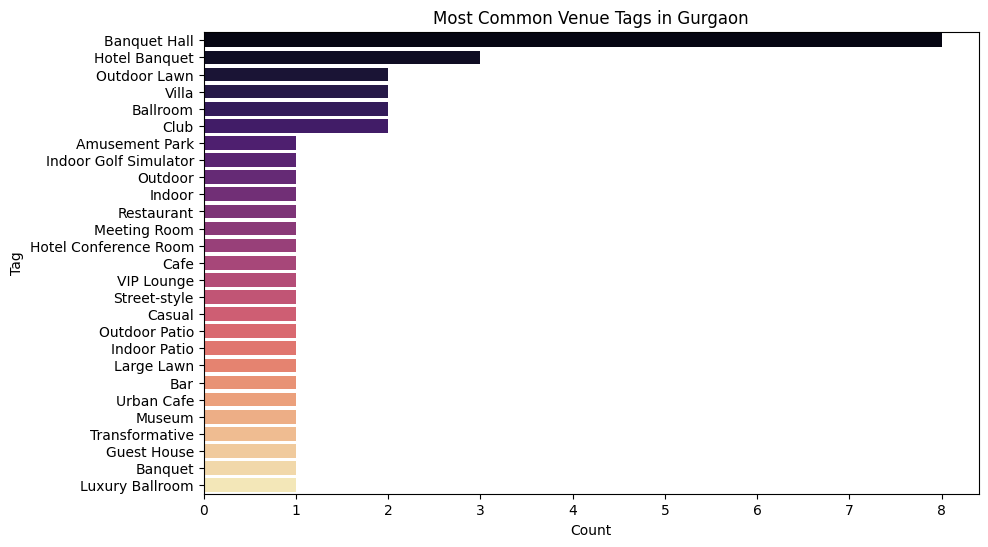

In [ ]:
from collections import Counter

all_tags = [tag.strip() for tags in df['Tags'].dropna() for tag in tags.split(',')]
tag_counts = Counter(all_tags)
tags_df = pd.DataFrame(tag_counts.items(), columns=["Tag", "Count"]).sort_values("Count", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Count", y="Tag", data=tags_df, palette="magma")
plt.title("Most Common Venue Tags in Gurgaon")
plt.xlabel("Count")
plt.ylabel("Tag")
plt.show()

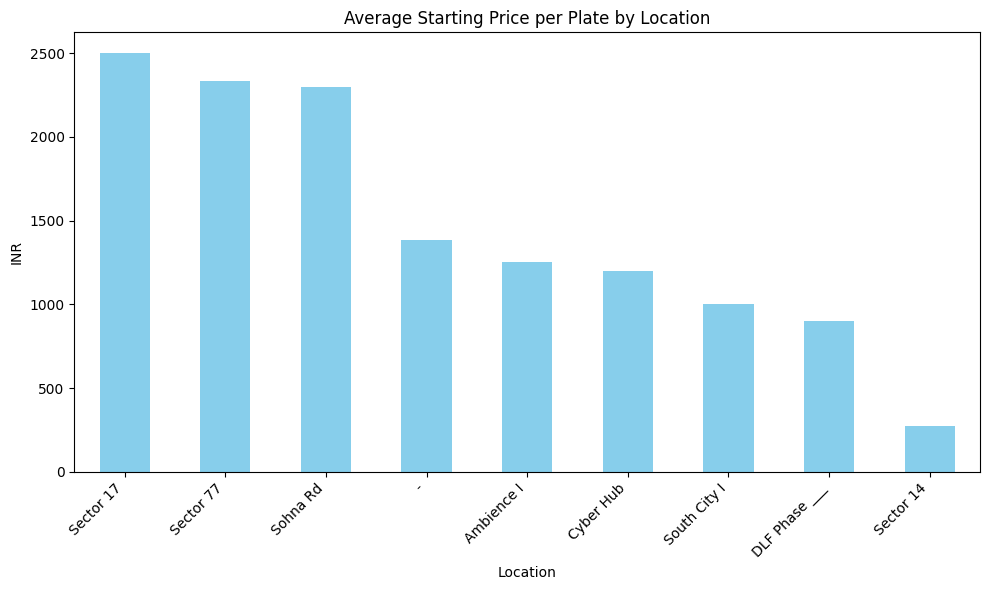

In [ ]:
location_price = df.groupby("Location")["Starting Price (per plate)"].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
location_price.plot(kind='bar', color='skyblue')
plt.title("Average Starting Price per Plate by Location")
plt.ylabel("INR")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df[['Venue Name', 'Capacity', 'Parsed Capacity', 'Starting Price (per plate)', 'Location', 'Rating', 'Tags']].head()

,Venue Name,Capacity,Parsed Capacity,Starting Price (per plate),Location,Rating,Tags
0,Chander Party Lawn of Aapno Ghar Resort,200–2500,1350.0,2950,Sector 77,4.5,"Amusement Park, Outdoor Lawn"
1,Abhinandan Hall of Aapno Ghar Resort,30–250,140.0,2450,Sector 77,4.5,Banquet Hall
2,Baza Restaurant of Aapno Ghar Resort,up to 150,150.0,1600,Sector 77,4.0,"Restaurant, Indoor"
3,Eton II of The Acura Bmk,30–100,65.0,1000,DLF Phase ___,4.8,Hotel Banquet
4,Hall 1 of Cherish Elegance,50–400,225.0,1299,-,NaN,Banquet Hall


In [ ]:
df['Rating'].fillna(df['Rating'].median(), inplace=True)

/tmp/ipython-input-17-3537473122.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(df['Rating'].median(), inplace=True)


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
from fastapi import FastAPI
import pandas as pd
from typing import Optional, Dict
from collections import Counter

app = FastAPI(title="Gurgaon Venue EDA API", description="API to analyze event venues in Gurgaon", version="1.0")

df = pd.read_csv("gurgaon_event_venues_enhanced.csv")

def convert_capacity(value: str) -> Optional[int]:
    if isinstance(value, str):
        value = value.lower().replace('up to', '').replace('+', '').strip()
        parts = value.replace('–', '-').split('-')
        try:
            nums = [int(p.strip()) for p in parts if p.strip().isdigit()]
            if len(nums) == 2:
                return sum(nums) // 2
            elif len(nums) == 1:
                return nums[0]
        except:
            return None
    return None

def clean_and_analyze(data: pd.DataFrame) -> Dict:
    data = data.copy()
    data['Capacity_Cleaned'] = data['Capacity'].apply(convert_capacity)
    data['Rating'].fillna(data['Rating'].median(), inplace=True)

    avg_price_by_location = data.groupby("Location")["Starting Price (per plate)"].mean().to_dict()
    tag_list = [tag.strip() for tags in data['Tags'] for tag in tags.split(',')]
    top_tags = Counter(tag_list).most_common(5)

    return {
        "total_venues": len(data),
        "avg_price_per_location": avg_price_by_location,
        "most_common_tags": top_tags,
        "sample_cleaned_data": data[['Venue Name', 'Capacity_Cleaned', 'Rating']].head().to_dict(orient="records")
    }

@app.get("/", tags=["Root"])
def root():
    return {"message": "Gurgaon Venue EDA API is live. Visit /docs for Swagger UI."}

@app.get("/analyze", tags=["Analysis"])
def analyze_data():
    insights = clean_and_analyze(df)
    return insights

In [ ]:
example = df['Tags'].iloc[0]
encoded = tokenizer(example, return_tensors='pt')
output = model(**encoded)
scores = softmax(output.logits[0].detach().numpy())

labels = ['Negative', 'Neutral', 'Positive']
for label, score in zip(labels, scores):
    print(f"{label}: {score:.4f}")

Negative: 0.0376
Neutral: 0.8446
Positive: 0.1178
